### **Import Libraries:**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr

### **Load Data:**

In [18]:
df = pd.read_csv('Transformed_Student_Performence_Data.csv')
df.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,19.833723,7,1,2,0,0,1,0,2
1,15.408756,0,0,1,0,0,0,0,1
2,4.210570,26,0,2,0,0,0,0,4
3,10.028829,14,0,3,1,0,0,0,3
4,4.672495,17,1,3,0,0,0,0,4


### **Bivariate Analysis:**

#### **Continues Columns VS Ordinal Target Column:**

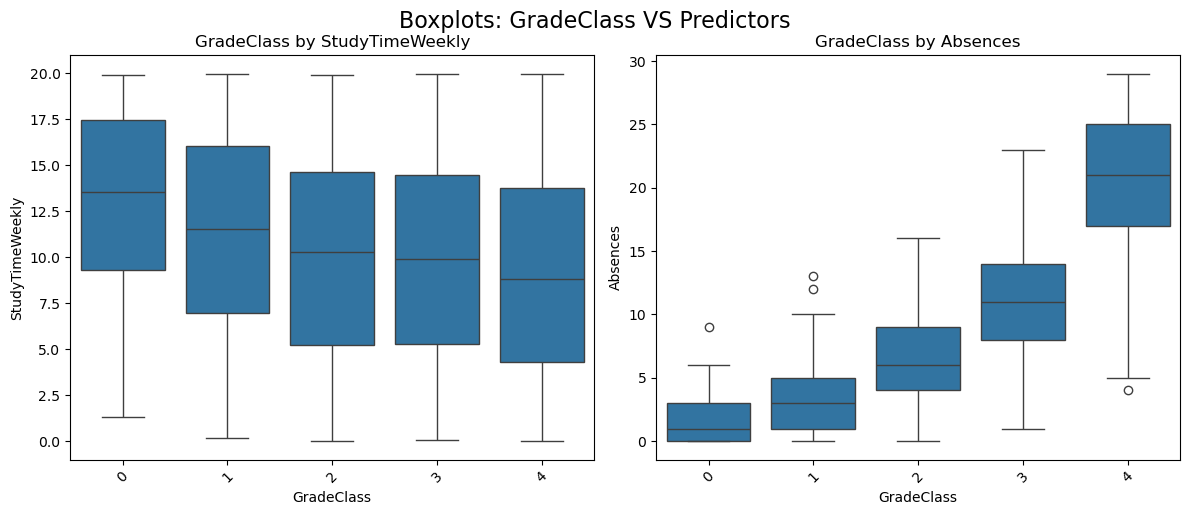

In [19]:
Columns = ['StudyTimeWeekly','Absences']
target = 'GradeClass'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()

for i, var in enumerate(Columns):
    sns.boxplot(x=df['GradeClass'], y=df[var], ax=axes[i])
    axes[i].set_title(f'GradeClass by {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots: GradeClass VS Predictors", fontsize=16, y=1.02)
plt.show()


In [20]:
Continues_columns = ['StudyTimeWeekly','Absences']  

# Loop and calculate the spearman correlation
for var in Continues_columns:
        corr, p_value = spearmanr(df[var], df['GradeClass'])
        print(f"GradClass by {var}:\n Spearman correlation = {corr:.3f}, p-value = {p_value:.4f}\n")
    

GradClass by StudyTimeWeekly:
 Spearman correlation = -0.143, p-value = 0.0000

GradClass by Absences:
 Spearman correlation = 0.856, p-value = 0.0000



#### **Binary Columns vs Ordinal Target Column:**

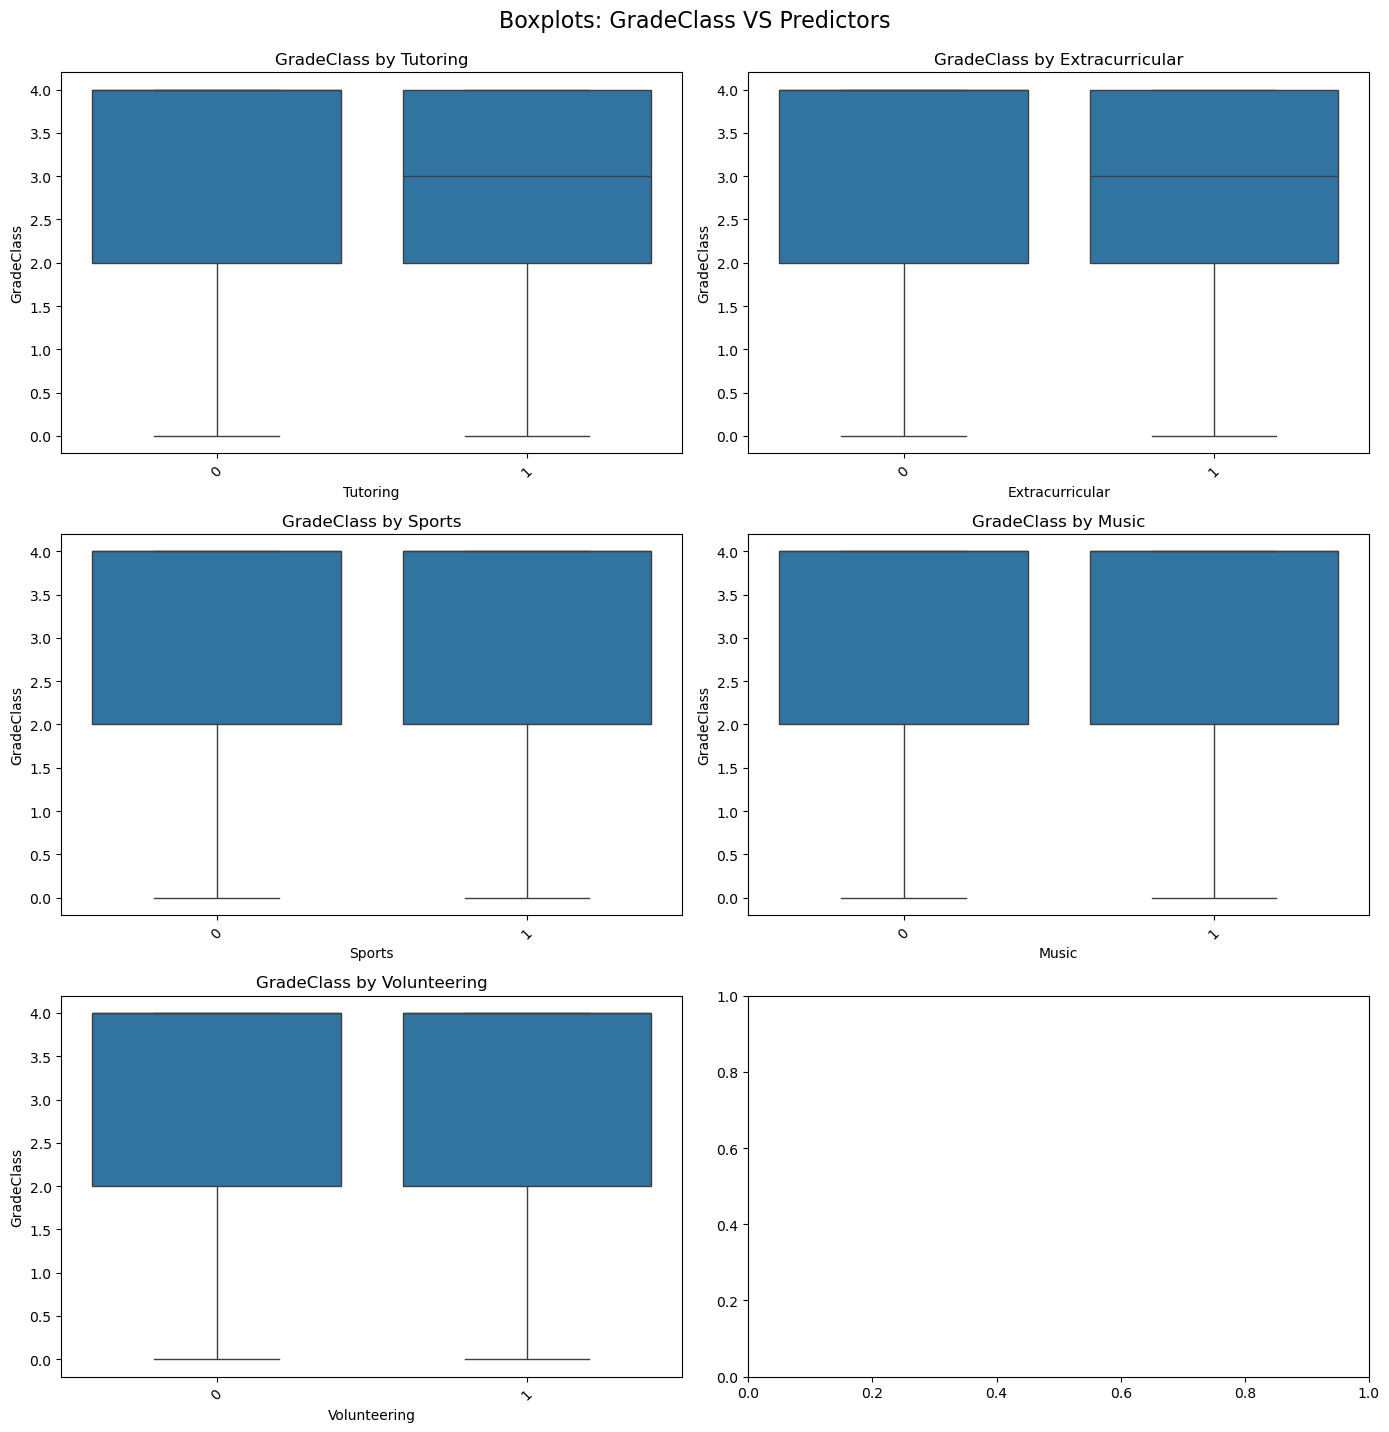

In [21]:
Columns = ['Tutoring','Extracurricular','Sports','Music','Volunteering']
target = 'GradeClass'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, var in enumerate(Columns):
    sns.boxplot(x=df[var], y=df['GradeClass'], ax=axes[i])
    axes[i].set_title(f'GradeClass by {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots: GradeClass VS Predictors", fontsize=16, y=1.02)
plt.show()

In [22]:
Catagorical_columns = ['Tutoring','Extracurricular','Sports','Music','Volunteering']  

# Loop and calculate point-biserial correlation
for var in Catagorical_columns:
        corr, p_value = pointbiserialr(df[var],df['GradeClass'])
        print(f"GradClass by {var}:\npointbiserialr correlation = {corr:.3f}, p-value = {p_value:.4f}\n")
    

GradClass by Tutoring:
pointbiserialr correlation = -0.122, p-value = 0.0000

GradClass by Extracurricular:
pointbiserialr correlation = -0.087, p-value = 0.0000

GradClass by Sports:
pointbiserialr correlation = -0.044, p-value = 0.0296

GradClass by Music:
pointbiserialr correlation = -0.052, p-value = 0.0106

GradClass by Volunteering:
pointbiserialr correlation = 0.007, p-value = 0.7286



#### **Ordinal Columns VS Ordinal Target Column:**

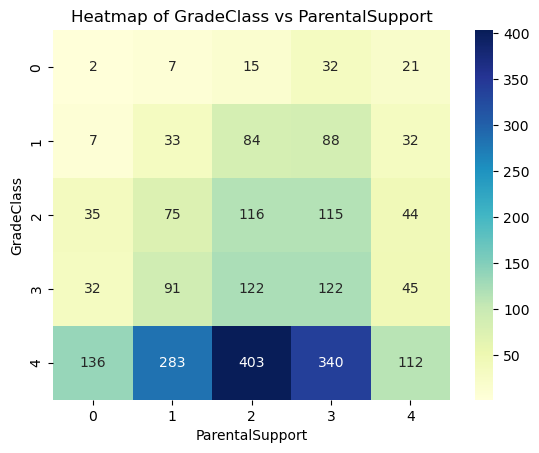

In [23]:
ct = pd.crosstab(df['GradeClass'],df['ParentalSupport'])

# Plot it as a heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of GradeClass vs ParentalSupport")
plt.xlabel("ParentalSupport")
plt.ylabel("GradeClass")
plt.show()

In [24]:
Catagorical_columns = ['ParentalSupport']  

# Loop and calculate point-biserial correlation
for var in Catagorical_columns:
        corr, p_value = spearmanr(df[var], df['GradeClass'])
        print(f"GradClass by {var}:\nspearmanr correlation = {corr:.3f}, p-value = {p_value:.4f}\n")

GradClass by ParentalSupport:
spearmanr correlation = -0.134, p-value = 0.0000

